# Importing Data and Dependencies / Liblaries

## nessecarry installs

In [342]:
# %pip install contractions
# %pip install wordninja
# %pip install tensorflow
# %pip install keras
# %pip install seaborn
# %pip install matplotlib
# %pip install nltk
# %pip install textblob

## Liblaries

In [ ]:
# Imports and downloads (move all to the top)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re

# took longer to run word ninja on gpu
# import tensorflow as tf
# from tensorflow import keras

import sys
from nltk.corpus import stopwords
from collections import Counter
import wordninja
from textblob import TextBlob
from textblob import Word
import contractions
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') # for tokenization
nltk.download('averaged_perceptron_tagger_eng') # for POS Tagging
nltk.download('wordnet')
nltk.download('stopwords') # for tokenization

# Check GPU and Python version
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# tf.test.is_built_with_cuda()
# print(tf.version.VERSION)
# print(sys.version)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eksudee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eksudee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\eksudee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eksudee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eksudee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# because i was running this in vs code
import time
start = time.time()

## Data

In [344]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Add a 'label' column to each DataFrame
fake_df['label'] = 'non-credible'
true_df['label'] = 'credible'

# Concatenate the DataFrames
df = pd.concat([fake_df, true_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",non-credible
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",non-credible
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",non-credible
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",non-credible
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",non-credible


- Imports the pandas library for data manipulation.
- Loads two CSV files, 'Fake.csv' and 'True.csv', into separate DataFrames: `fake_df` and `true_df`.
- Adds a new column called `label` to each DataFrame to indicate whether the news is 'credible' or 'non-credible'.
- Concatenates the two DataFrames into a single DataFrame `df`, combining both credible and non-credible news articles.
- Displays the first few rows of the combined DataFrame to provide an overview of the merged dataset.

# EDA and Data Cleaning


## Basic EDA / Dataset Overview

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


The `df.info()` method provides a concise summary of the DataFrame

In [346]:
df.shape

(44898, 5)

The `df.shape` attribute returns a tuple representing the dimensions of the DataFrame.(rows and collumns)

The output `(44898, 5)` indicates that the DataFrame `df` contains 44,898 rows and 5 columns.

## Dropping non essential features

In [347]:
df = df.drop(columns=['subject', 'date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


We dropped the `subject` and `date` columns because they are not essential for the initial analysis or modeling.
Removing these columns helps to focus on the main textual content (`title`, `text`) and the target label (`label`). 
Additionally it also simplifies the dataset and reduces noise.

## Combine Title and Text in to one collum

In [348]:
df['content'] = df['title'] + ' ' + df['text']
df = df.drop(columns=['title', 'text'])
df = df[['content', 'label']]
df.head()

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,non-credible
1,Drunk Bragging Trump Staffer Started Russian ...,non-credible
2,Sheriff David Clarke Becomes An Internet Joke...,non-credible
3,Trump Is So Obsessed He Even Has Obama’s Name...,non-credible
4,Pope Francis Just Called Out Donald Trump Dur...,non-credible


The code combines the "title" and "text" columns into a new "content" column, then removes the original "title" and "text" columns, leaving only "content" and "label" in the DataFrame. This simplifies the dataset by merging all relevant text into a single column for easier processing and analysis, and displays the first few rows of the updated DataFrame.

## Converting text to lowercase

In [349]:
df['content'] = df['content'].str.lower()
df.head()

,content,label
0,donald trump sends out embarrassing new year’...,non-credible
1,drunk bragging trump staffer started russian ...,non-credible
2,sheriff david clarke becomes an internet joke...,non-credible
3,trump is so obsessed he even has obama’s name...,non-credible
4,pope francis just called out donald trump dur...,non-credible


code that maps the `'content'` collumn of the DateFrame to itself after converting it in to lower case using the `.str.lower()` method

## Missing Values

In [350]:
print(df.isnull().sum())

content    0
label      0
dtype: int64



This code prints the number of missing (null) values in each column of the DataFrame `df

The output shows us that the dataset has no missing values

## Finding and Handling Duplicates

In [351]:
print(df['label'].value_counts())

label
non-credible    23481
credible        21417
Name: count, dtype: int64


The code takes the current DataFrame and uses the value_counts() method on the 'label' column to count the number of articles in each class (credible and non-credible).

In [352]:
duplicate_content = df[df.duplicated(subset='content')]
duplicate_content

,content,label
9942,hillary tweets message in defense of daca…oops...,non-credible
11446,former democrat warns young americans: “rioter...,non-credible
14925,[video] #blacklivesmatter terrorists storm dar...,non-credible
15892,house intel slaps subpoenas on mccain institut...,non-credible
15893,priceless! watch msnbc host’s shocked response...,non-credible
...,...,...
44709,france unveils labor reforms in first step to ...,credible
44744,guatemala top court sides with u.n. graft unit...,credible
44771,"europeans, africans agree renewed push to tack...",credible
44834,thailand's ousted pm yingluck has fled abroad:...,credible


The code creates a new DataFrame called `duplicate_content` that stores rows with duplicate values in the "content" column. This is achieved using the `duplicated()` function, which identifies all but the first occurrence of each duplicate which is later displayed. From the output we know that there are 5793 rows of duplicate values (first occurances)

In [353]:
print(duplicate_content['label'].value_counts())

label
non-credible    5573
credible         220
Name: count, dtype: int64


The code takes the duplicate_content DataFrame using ".value_count()" and displays the counts the number of articles in each class, The output shows that the most amount of duplicates are within the rows classified as "non-credible" articles at 5573 articles while only 220 "credible" artiles are duplicated

In [354]:
df = df.drop_duplicates(subset='content', keep='first').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39105 entries, 0 to 39104
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  39105 non-null  object
 1   label    39105 non-null  object
dtypes: object(2)
memory usage: 611.1+ KB


The `.drop_duplicates()` method is used to drop duplicate rows found in the `content` column, the `keep = first` parameter makes it so that the first occurance of the article in the dataset and drops the rest. `reset_index()` is used to reset the row index of the DataFrame after the drop opperation and the `drop=true` parameter makes sure that the old index is not added as a seperate collumn and is completely discarded

In [355]:
print(df['label'].value_counts())

label
credible        21197
non-credible    17908
Name: count, dtype: int64


DataFrame distribution after dropping duplicate content

In [356]:
df

,content,label
0,donald trump sends out embarrassing new year’...,non-credible
1,drunk bragging trump staffer started russian ...,non-credible
2,sheriff david clarke becomes an internet joke...,non-credible
3,trump is so obsessed he even has obama’s name...,non-credible
4,pope francis just called out donald trump dur...,non-credible
...,...,...
39100,'fully committed' nato backs new u.s. approach...,credible
39101,lexisnexis withdrew two products from chinese ...,credible
39102,minsk cultural hub becomes haven from authorit...,credible
39103,vatican upbeat on possibility of pope francis ...,credible


## Handling Contractions

In [357]:
df['content'] = df['content'].apply(contractions.fix)

In [358]:
df['content'].iloc[476]

" the exact same texas lawmakers that voted against hurricane relief are now begging for help when hurricane sandy hit, affecting states all the way from north carolina to new england and particularly devastating new york and new jersey in 2012, texas lawmakers overwhelmingly voted against recovery assistance. in fact, john culberson, whose 7th congressional district includes parts of houston, was the only texas republican in congress in favor of the $50.7 billion relief effort.one of the loudest opponents of sandy aid was ted cruz, who was merely weeks away from becoming a texas senator. cruz s main concerns involved additional spending, which included funding for disaster preparedness and relief in other parts of the country as a means of gaining support for the hurricane sandy relief effort. hurricane sandy inflicted devastating damage on the east coast, and congress appropriately responded with hurricane relief,  cruz said in a statement at the time in an effort to justify his stan

## Finding and Handling usernames, hashtags, and emails

In [359]:
def count_users_hash(dataframe):

    email_count = dataframe['content'].str.count(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+').sum()
    print(f"Total email addresses: {email_count}")
    
    username_count = dataframe['content'].str.count(r'@[A-Za-z0-9_]{1,15}\b').sum()
    print(f"Total Twitter usernames: {username_count}")


count_users_hash(df)

Total email addresses: 44
Total Twitter usernames: 24782


In [360]:

def clean_text(text):
    
    text = re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', '', text)

    text = re.sub(r'@[A-Za-z0-9_]{1,15}\b', '', text)
    
    return text

df['content'] = df['content'].apply(clean_text)
count_users_hash(df)

Total email addresses: 0
Total Twitter usernames: 0


## Finding and Handling HTML tags and URL's

In [361]:
df['content'].iloc[0]


' donald trump sends out embarrassing new year’s eve message; this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump () december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, pett

In [362]:
def count_links(dataframe):

    html_tag_count = df['content'].str.contains(r'<.*?>', regex=True).sum()
    url_count = df['content'].str.contains(r'http\S+|www\.\S+', regex=True).sum()
    dot_com_count = df['content'].str.count(r'\b\w+\.\w+\.(com|org|net|gov|edu|info|io|co|us|uk|in|au|ca|de|fr|ru|jp|cn|br|za)\b').sum()
    

    print(f"Links matching (abc.xyz.com(others)) pattern: {dot_com_count}")
    print(f"Rows with HTML tags: {html_tag_count}")
    print(f"Rows with URLs: {url_count}")

count_links(df)
df.shape

Links matching (abc.xyz.com(others)) pattern: 5845
Rows with HTML tags: 68
Rows with URLs: 2589


(39105, 2)

In [363]:

def clean_text(text):

    text = re.sub(r'\b\w+\.\w+\.(com|org|net|gov|edu|info|io|co|us|uk|in|au|ca|de|fr|ru|jp|cn|br|za)\b', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    return text

df['content'] = df['content'].apply(clean_text)
df.head()

,content,label
0,donald trump sends out embarrassing new year’...,non-credible
1,drunk bragging trump staffer started russian ...,non-credible
2,sheriff david clarke becomes an internet joke...,non-credible
3,trump is so obsessed he even has obama’s name...,non-credible
4,pope francis just called out donald trump dur...,non-credible


In [364]:
count_links(df)
df.shape

Links matching (abc.xyz.com(others)) pattern: 0
Rows with HTML tags: 0
Rows with URLs: 0


(39105, 2)

In [365]:
df['content'].iloc[0]

' donald trump sends out embarrassing new year’s eve message; this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump () december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, pett

## Handling Special characters and Digits (non-word and non-whitespaces)

In [366]:
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
df = df.replace(to_replace=r'\d', value='', regex=True)
df.head()

,content,label
0,donald trump sends out embarrassing new years...,noncredible
1,drunk bragging trump staffer started russian ...,noncredible
2,sheriff david clarke becomes an internet joke...,noncredible
3,trump is so obsessed he even has obamas name ...,noncredible
4,pope francis just called out donald trump dur...,noncredible


here the `df.replace()` function is used to replace all characters that are not(`^`) words ((a-z, A-Z), digits (0-9), and underscore (_)) (`\w`) or whitespaces (`\s`), and are replaces with an empty string (`value=''`). This is done to reduce noise and improve consistency as special characters often do not add any meaningful information to text classification and analytics casts and removing them helps standardize the text making future tokenizations and processing easier

the code also replaces all digits (`\d`) with and empty string

Note: '[^\w\s]' = NOT (`^`) words or whitespaces while '\d' = IS digits

In [367]:
# Count rows with extra (consecutive) white spaces in 'content'
extra_ws_mask = df['content'].str.contains(r'\s{2,}', regex=True)
extra_ws_count = extra_ws_mask.sum()
print(f"Rows with extra white spaces: {extra_ws_count}")

# Print an example row with extra white spaces, if any exist
if extra_ws_count > 0:
    example_row = df[extra_ws_mask].iloc[0]
    print("Example with extra white spaces:")
    print(example_row['content'])
else:
    print("No extra white spaces found in the dataset.")


Rows with extra white spaces: 38450
Example with extra white spaces:
 donald trump sends out embarrassing new years eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  president angry pants tweeted   will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  will be a great year for america  donald j trump  december  trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting l

In [368]:
df['content'].iloc[0]

' donald trump sends out embarrassing new years eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  president angry pants tweeted   will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year  will be a great year for america  donald j trump  december  trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of

## Handling extra whitespaces

In [369]:
# Remove extra (consecutive) white spaces from 'content'
df['content'] = df['content'].str.replace(r'\s+', ' ', regex=True).str.strip()
df.head()

,content,label
0,donald trump sends out embarrassing new years ...,noncredible
1,drunk bragging trump staffer started russian c...,noncredible
2,sheriff david clarke becomes an internet joke ...,noncredible
3,trump is so obsessed he even has obamas name c...,noncredible
4,pope francis just called out donald trump duri...,noncredible


In [370]:
df['content'].iloc[0]

'donald trump sends out embarrassing new years eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year president angry pants tweeted will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year will be a great year for america donald j trump december trump s tweet went down about as welll as you d expectwhat kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency w

## Handling missing whitespaces (Experimental, remove if bad)

based on `https://stackoverflow.com/questions/8870261/how-to-split-text-without-spaces-into-list-of-words`

In [371]:
df['content'] = df['content'].apply(lambda x: ' '.join(wordninja.split(x)))

In [372]:
df['content'].iloc[0]

'donald trump sends out embarrassing new years eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year president angry pants tweeted will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year will be a great year for america donald j trump december trump s tweet went down about as well l as you d expect what kind of president sends a new year s greeting like this despicable petty infantile gibberish only trump his lack of decency

In [373]:
df

,content,label
0,donald trump sends out embarrassing new years ...,noncredible
1,drunk bragging trump staffer started russian c...,noncredible
2,sheriff david clarke becomes an internet joke ...,noncredible
3,trump is so obsessed he even has obama s name ...,noncredible
4,pope francis just called out donald trump duri...,noncredible
...,...,...
39100,fully committed nato backs new you s approach ...,credible
39101,lex isn ex is withdrew two products from chine...,credible
39102,minsk cultural hub becomes haven from authorit...,credible
39103,vatican upbeat on possibility of pope francis ...,credible


# Data Preprocessing

Copy of df is created to not have to run the preprocessing over and over again if a mistake happens

In [407]:
df_clean = df.copy()
df_pre = df_clean.copy()

In [408]:
df_pre.head()

,content,label
0,donald trump sends out embarrassing new years ...,noncredible
1,drunk bragging trump staffer started russian c...,noncredible
2,sheriff david clarke becomes an internet joke ...,noncredible
3,trump is so obsessed he even has obama s name ...,noncredible
4,pope francis just called out donald trump duri...,noncredible


## Tokenization

In [410]:
from textblob import TextBlob

from nltk.tokenize import word_tokenize

df_pre['content'] = df_pre['content'].apply(word_tokenize)

In [411]:
df_pre.head()

,content,label
0,"[donald, trump, sends, out, embarrassing, new,...",noncredible
1,"[drunk, bragging, trump, staffer, started, rus...",noncredible
2,"[sheriff, david, clarke, becomes, an, internet...",noncredible
3,"[trump, is, so, obsessed, he, even, has, obama...",noncredible
4,"[pope, francis, just, called, out, donald, tru...",noncredible


## Stop word removal

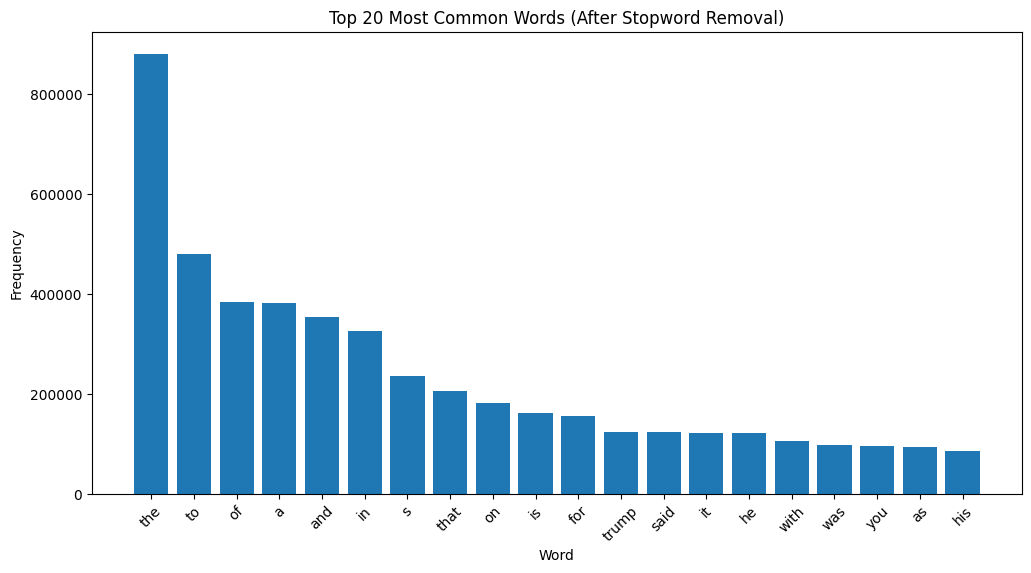

In [412]:
# Flatten the list of tokens from all documents
all_tokens = [token for tokens in df_pre['content'] for token in tokens]

# Count word frequencies
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*most_common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words (After Stopword Removal)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [413]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df_pre['content'] = df_pre['content'].apply(remove_stopwords)
df_pre.head()

,content,label
0,"[donald, trump, sends, embarrassing, new, year...",noncredible
1,"[drunk, bragging, trump, staffer, started, rus...",noncredible
2,"[sheriff, david, clarke, becomes, internet, jo...",noncredible
3,"[trump, obsessed, even, obama, name, coded, we...",noncredible
4,"[pope, francis, called, donald, trump, christm...",noncredible


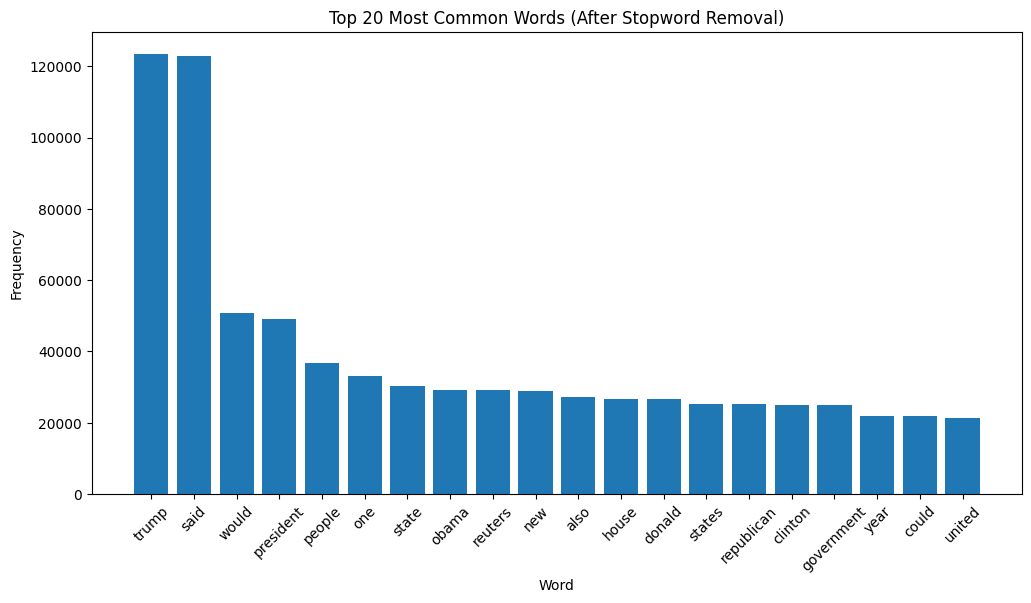

In [414]:
# Flatten the list of tokens from all documents
all_tokens = [token for tokens in df_pre['content'] for token in tokens]

# Count word frequencies
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*most_common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words (After Stopword Removal)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Lematization

In [415]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df_pre['content'] = df_pre['content'].apply(lemmatize_tokens)
df_pre.head()

,content,label
0,"[donald, trump, sends, embarrassing, new, year...",noncredible
1,"[drunk, bragging, trump, staffer, started, rus...",noncredible
2,"[sheriff, david, clarke, becomes, internet, jo...",noncredible
3,"[trump, obsessed, even, obama, name, coded, we...",noncredible
4,"[pope, francis, called, donald, trump, christm...",noncredible


# Train Test Split

## Spliting

In [427]:
from sklearn.model_selection import train_test_split

df_pre['content_str'] = df_pre['content'].apply(lambda tokens: ' '.join(tokens))

X = df_pre['content_str'] 
y = df_pre['label']


X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train_text.shape, X_test_text.shape, y_train.shape, y_test.shape)

(27373,) (11732,) (27373,) (11732,)


# Feature Selection

## Bag of Words

In [ ]:
# --- Bag of Words (BOW) Feature Extraction ---

from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer (you can adjust max_features or min_df as needed)
vectorizer = CountVectorizer( min_df = 10, max_df=0.7 , max_features=5000, ngram_range=(1, 2))

# Fit on training data and transform both train and test
X_train_bow = vectorizer.fit_transform(X_train_text)
X_test_bow = vectorizer.transform(X_test_text)

# Convert to DataFrame for better visualization
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(X_train_bow.toarray(), columns=feature_names)
bow_df.head()

,aad,ab,abandon,abandoned,abbas,abc,abc news,abdullah,abed,ability,...,yr,zar,ze,zealand,zero,zi,zi ka,zimbabwe,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_bow, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [492]:
# Predict on test set
y_pred = lr_model.predict(X_test_bow)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9871292192294578
              precision    recall  f1-score   support

    credible       0.99      0.99      0.99      6359
 noncredible       0.99      0.98      0.99      5373

    accuracy                           0.99     11732
   macro avg       0.99      0.99      0.99     11732
weighted avg       0.99      0.99      0.99     11732



In [ ]:
end = time.time()
elapsed_minutes = (end - start) / 60
print(f"Elapsed time: {elapsed_minutes:.2f} minutes")

In [497]:
test_text = ["WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "]

# Transform the text using the fitted vectorizer
test_vector = vectorizer.transform(test_text)

# Predict
y_manual_pred = lr_model.predict(test_vector)
print("Prediction:", y_manual_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.